In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pylab as plt
from matplotlib.colors import LogNorm
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from glob import glob

import seaborn as sns
sns.set_context('paper')
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 10}


matplotlib.rc('font', **font)
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.titlepad'] = 0.1
plt.rcParams['axes.labelpad'] = 0.1

figure_dir = "figures_paper/"
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
mpl_blue = "#1f77b4"
mpl_red = "#d62728"

In [2]:
def log_sum(exp_part_list):
    import numpy as np
    if len(exp_part_list) == 0:
        return -np.inf
    exp_part_list = np.sort(exp_part_list)[-1::-1]
    result = exp_part_list[0].copy()
    for exp_part in exp_part_list[1:]:
        if exp_part == -np.inf:
            continue
        elif result == -np.inf:
            result = exp_part.copy()
        else:
            result = result + np.log(1.0+np.exp(exp_part-result))
    return result

# Harmonic springs

## Figure 1 ##

quench gammas: [2.0, 1.0, 0.1, 0.01]


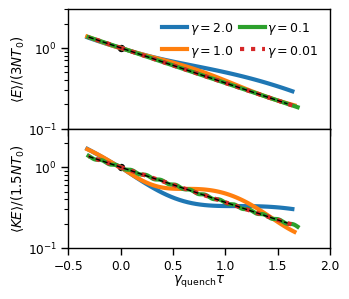

In [3]:
T0=2
N=1000

data_files = glob(f"quench_results/harmonic/quench_energies/mean_etot_trj_N{N}_K5.0_rt{T0:2.1f}_qg*.npy")
#sort data_files by qg
data_files = sorted(data_files, key=lambda x: float(os.path.basename(x).split("qg")[1].split(".npy")[0]))

qg_list = []
time_list = []
stride = 20

ideal_start = 3*N*T0

#make two stacked subplots with no vertical space
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=True,gridspec_kw={'hspace':0.0},figsize=(3+3./8,3.1))

for data_file in data_files[1:][::-1]:
    # get qg value
    qg = float(os.path.basename(data_file).split("qg")[1].split(".npy")[0])
    qg_list.append(qg)
    linestyle='-'
    if qg == 0.01:
        linestyle=':'
    data = np.load(data_file)
    times = np.arange(0,data.shape[0],stride)/1e3*qg
    dt = times[1]-times[0]
    reverse_start = np.where(data[1:]-data[:-1]>100)[0][0]//stride
    break_time = times[reverse_start]
    n_reverse = len(data[stride*(reverse_start+1)::stride])

    p = ax1.plot(times[:reverse_start],data[::stride][:reverse_start]/ideal_start,label=f"$\gamma={qg}$",lw=3,linestyle=linestyle)
    ax1.plot(np.linspace(-dt,-dt*(n_reverse+1),n_reverse),data[stride*(reverse_start+1)::stride]/ideal_start,color=p[0].get_color(),lw=3,linestyle=linestyle)
    min_time = -dt*n_reverse
    max_time = times[:reverse_start].max()

ax1.plot(np.arange(min_time,max_time,0.1),np.exp(-np.arange(min_time,max_time,0.1)),'--',color='k',lw=1)#label="$\exp(- \gamma \\tau)$")
ax1.scatter([0],[1],marker='o',color='k',s=20)
ax1.set_xlabel('$\gamma_\mathrm{quench} \\tau$')
ax1.set_ylabel('$\\langle E \\rangle / (3 N T_0)$')
ax1.legend(loc=0,fontsize=9,framealpha=0,ncol=2,handletextpad=0.2,columnspacing=0.5)
ax1.set_xlim(-0.5,2)

ax1.set_yscale('log')
ax1.set_ylim(1e-1,3)


#now kinetic energy 

ideal_start = 3*N*T0/2

print("quench gammas:",qg_list)

data_files = glob("quench_results/harmonic/quench_energies/mean_ekin_trj_N1000_K5.0_rt2.0_qg*.npy")
#sort data_files by qg
data_files = sorted(data_files, key=lambda x: float(os.path.basename(x).split("qg")[1].split(".npy")[0]))

qg_list = []

for data_file in data_files[1:][::-1]:
    # get qg value
    qg = float(os.path.basename(data_file).split("qg")[1].split(".npy")[0])
    qg_list.append(qg)
    linestyle='-'
    if qg == 0.01:
        linestyle=':'
    data = np.load(data_file)
    times = np.arange(0,data.shape[0],stride)/1e3*qg
    dt = times[1]-times[0]
    reverse_start = np.where(data[1:]-data[:-1]>100)[0][0]//stride
    break_time = times[reverse_start]
    n_reverse = len(data[stride*(reverse_start+1)::stride])
    p = ax2.plot(times[:reverse_start],data[::stride][:reverse_start]/ideal_start,label=f"$\gamma={qg}$",lw=3,linestyle=linestyle)
    ax2.plot(np.linspace(-dt,-dt*(n_reverse+1),n_reverse),data[stride*(reverse_start+1)::stride]/ideal_start,color=p[0].get_color(),lw=3,linestyle=linestyle)
    min_time = -dt*n_reverse
    max_time = times[:reverse_start].max()



ax2.plot(np.arange(min_time,max_time,0.1),np.exp(-np.arange(min_time,max_time,0.1)),'--',color='k',lw=1)#label="$\exp(- \gamma \\tau)$")
ax2.scatter([0],[1],marker='o',color='k',s=20)
ax2.set_xlabel('$\gamma_\mathrm{quench} \\tau$')
ax2.set_ylabel('$\\langle KE \\rangle / (1.5 N T_0)$')

plt.savefig(os.path.join(figure_dir,"energy_v_quench_time_harmonic_N1000_Tstart2.0.pdf"),bbox_inches='tight')

## Figure S1 ## 

['quench_results/harmonic/lnQ_ratios/lnQ_ratio_trj_list_N1000_K5.0_rt2.0_rg1.00e-02_qg1.00e-02.npy', 'quench_results/harmonic/lnQ_ratios/lnQ_ratio_trj_list_N1000_K5.0_rt2.0_rg1.00e-02_qg1.00e-01.npy', 'quench_results/harmonic/lnQ_ratios/lnQ_ratio_trj_list_N1000_K5.0_rt2.0_rg1.00e-02_qg1.00e+00.npy', 'quench_results/harmonic/lnQ_ratios/lnQ_ratio_trj_list_N1000_K5.0_rt2.0_rg1.00e-02_qg2.00e+00.npy']
(2000, 100000)
(2000, 10000)
(2000, 1000)
(2000, 500)
[-1431.48558003 -1431.50329512 -1431.55256308 ... -2079.43707878
 -2079.43707878 -2079.43707878]
Final error qg2.0:  -0.15583520881150106
Final error qg1.0:  -0.10606283214950353
Final error qg0.1:  0.00017687758369749903
Final error qg0.01:  2.1462012423790557e-06


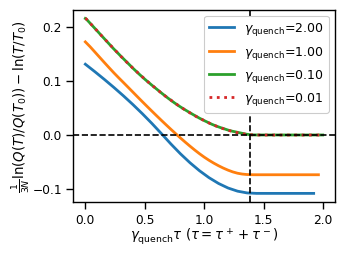

In [4]:
data_files = glob("quench_results/harmonic/lnQ_ratios/lnQ_ratio_trj_list_N1000_K5.0_rt2.0_rg1.00e-02_qg*.npy")
#sort data_files by qg
data_files = sorted(data_files, key=lambda x: float(os.path.basename(x).split("qg")[1].split(".npy")[0]))
print(data_files)

qg_list = []
lnQ_computed_t_list = []
time_list = []
stride = 20
for data_file in data_files:
    # get qg value
    qg = float(os.path.basename(data_file).split("qg")[1].split(".npy")[0])
    qg_list.append(qg)

    data = np.load(data_file)
    print(data.shape)
    number_time_points = data.shape[-1]//stride
    lnQ_vs_t = np.zeros(number_time_points)

    for tidx, t in enumerate(range(0,data.shape[-1],stride)):
        lnQ_vs_t[tidx] = log_sum(data[:,t]) - np.log(len(data))
    time_list.append(np.arange(0,data.shape[-1],stride)*2/1e3)
    lnQ_computed_t_list.append(lnQ_vs_t)


print(lnQ_computed_t_list[0])

# plot
plt.figure(figsize=(3+3./8,2.5))
for i in range(len(qg_list)-1,-1,-1):
    linestyle='-'
    if qg_list[i] == 0.01:
        linestyle=':'
    plt.plot(time_list[i]*qg_list[i],( lnQ_computed_t_list[i]/3000)-np.log(0.5) , label="$\gamma_\mathrm{{quench}}$={:.2f}".format(qg_list[i]),linestyle=linestyle,lw=2)
    print(f"Final error qg{qg_list[i]}: ", ((lnQ_computed_t_list[i]/3000)[-1]-np.log(0.5))/np.log(2))
plt.axhline(0,linestyle='--',color='k')
plt.axvline(2*np.log(2),linestyle='--',color='k')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel("$\\frac{1}{3 N} \ln(Q(T)/Q(T_0))-\ln(T/T_0)$")
plt.xlabel("$\gamma_\mathrm{quench} \\tau$ ($\\tau = \\tau^+ + \\tau^-$)")
#plt.title("$N=1000$")
plt.legend(loc=0,fontsize=9,framealpha=1.0)

plt.savefig(os.path.join(figure_dir,"lnQ_error_v_quench_time_harmonic_N1000.pdf"),bbox_inches='tight')


## Figure S2 ##

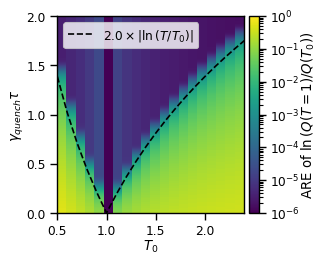

In [5]:
N = 1000
dof = 3.0 * N
quench_gamma = 0.01
dt = 0.001 

run_gamma = 0.01
target_temp = 1.0
target_kbt = 1.0

run_temp_list = np.arange(0.5,2.5,0.1)

dgT = dt*quench_gamma
gT_list = 2.0 * np.arange(dgT,1+dgT,dgT)
error_matrix = np.zeros((len(run_temp_list),len(gT_list)))

in_dir = "quench_results/harmonic/lnQ_ratios/"

for i,run_temp in enumerate(run_temp_list):
    ref = np.log(target_temp / run_temp) # ln(T/T0)
    data_file = os.path.join(in_dir,"lnQ_ratio_trj_N1000_K5.0_rt%.1f_rg%.2e_qg%.2e.npy"%(run_temp,run_gamma,quench_gamma))
    lnQ_ratio_trj = np.load(data_file)/dof
    #add regularization for when comparing T0 to T0
    error_matrix[i] = np.abs((lnQ_ratio_trj-ref)/(ref+1e-8))


plt.figure(figsize=(3+3./8,3+3./8))
ax = plt.gca()

#multiply by 0 on y axis limit to indicate that the time goes from 0 to 2
im = ax.imshow(error_matrix.T,origin="lower",extent=(run_temp_list.min(),run_temp_list.max()
            ,0*gT_list.min(),gT_list.max()),norm=LogNorm(vmin=1e-6, vmax=1),interpolation='none')
ax.set_yticks(np.arange(0,2.1,0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax.plot(run_temp_list,2*np.abs(np.log(run_temp_list)),"--",color="black",label=r"$2.0\times|\ln{(T/T_0)}|$")
plt.colorbar(im,cax=cax,label=r"ARE of $\ln{\left(Q(T=1)/Q(T_0)\right)}$")
ax.set_xlabel("$T_0$")
ax.set_ylabel(r"$\gamma_{quench} \tau$")
ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(figure_dir,"quench_error_changing_tau_T0_harmonic_N1000_qg1e-2.png"),bbox_inches='tight',dpi=300)

## Figure 2 ##

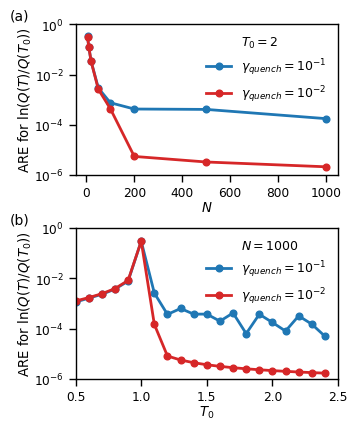

In [6]:
run_temp_list = np.arange(0.5,2.5,0.1)
N_list = [5,10,20,50,100,200,500,1000]
quench_gamma_list = [0.1,0.01]
color_list = [mpl_blue,mpl_red]

fig, ax = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=True,figsize=(3+3./8,4.1))
plt.viridis()

ax[0].plot([], marker="", ls="",label="$T_0=2$")
for qidx, quench_gamma in enumerate(quench_gamma_list):
    error_N = np.load(os.path.join(in_dir,"infinite_stopping_error_rt2.0_qg%.2e_N.npy"%(quench_gamma)))
    ax[0].plot(N_list,error_N,marker='o',lw=2,label=r"$\gamma_{quench}=10^{%d}$"%(np.log10(quench_gamma)),c=color_list[qidx])

ax[0].set_xlabel("$N$")
ax[0].set_ylabel("ARE for $\ln(Q(T)/Q(T_0))$")
ax[0].set_yscale('log')
ax[0].legend(loc=0,fontsize=9,framealpha=0)
ax[0].set_ylim(1e-6,1)
ax[1].set_xlim(0,1000)


ax[0].text(-0.25,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
ax[1].text(-0.25,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')

ax[1].plot([], marker="", ls="",label="$N=1000$")
for qidx, quench_gamma in enumerate(quench_gamma_list):
    error_T = np.load(os.path.join(in_dir,"infinite_stopping_error_N1000_qg%.2e_T.npy"%(quench_gamma)))
    ax[1].plot(run_temp_list,error_T,marker='o',lw=2,label=r"$\gamma_{quench}=10^{%d}$"%(np.log10(quench_gamma)),c=color_list[qidx])

ax[1].set_ylabel("ARE for $\ln(Q(T)/Q(T_0))$")
ax[1].set_xlabel("$T_0$")
ax[1].set_xlim(0.5,2.5)
ax[1].legend(loc=0,fontsize=9,framealpha=0)
plt.tight_layout(pad=0)
plt.savefig(os.path.join(figure_dir,"error_springs_stoptime_NorT.pdf"),bbox_inches='tight')

## Figure S3 ##

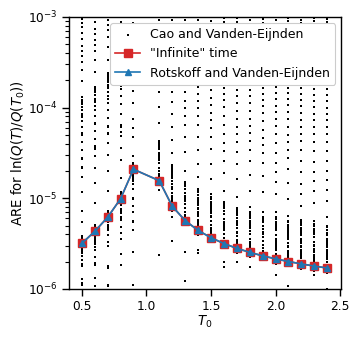

In [7]:
target_kbt = 1.0 
run_temp_list = np.arange(0.5,2.5,0.1)
#quench_gamma_list = [0.1,0.01]
quench_gamma_list = [0.01]
nrestarts = 2000

run_gamma = 0.01
kappa = 5

in_dir = "quench_results/harmonic/compare_estimators"

for N in [1000]:
    dof = 3.0 * N
    for quench_gamma in quench_gamma_list:
        plt.figure(figsize=(3.4,3.2))
        plot_temps = []
        time_ave_error = []
        infinite_stopping_error = []
        infinite_error = []

        finite_x = []
        finite_y = []
        for run_temp in run_temp_list:
            if np.isclose(run_temp,1.0):
                continue
            plot_temps.append(run_temp)
            ideal = dof * np.log(1.0/run_temp)
            run_kbt = run_temp 
            # add this because lnQ file is a log sum, not a mean:       -np.log(nrestarts)    
            finite_lnQ = -np.log(nrestarts) + np.load(os.path.join(in_dir,"cao_lnQ_N%d_K%.1f_rt%.1f_rg%.2e_qg%.2e.npy"%(N,kappa,run_temp,run_gamma,quench_gamma)))

            infinite_stopping_lnQ_list = np.load(os.path.join(in_dir,"rotskoff_lnQ_list_N%d_K%.1f_rt%.1f_rg%.2e_qg%.2e.npy"%(N,kappa,run_temp,run_gamma,quench_gamma)))
            infinite_stopping_lnQ = log_sum(infinite_stopping_lnQ_list) - np.log(len(infinite_stopping_lnQ_list))

            infinite_lnQ = -np.log(nrestarts) + np.load(os.path.join(in_dir,"infinite_lnQ_N%d_K%.1f_rt%.1f_rg%.2e_qg%.2e.npy"%(N,kappa,run_temp,run_gamma,quench_gamma)))
            finite_x.extend(np.ones(len(finite_lnQ))*run_temp)
            finite_y.extend(np.abs((finite_lnQ-ideal)/ideal))
            infinite_stopping_error.append(np.abs((infinite_stopping_lnQ-ideal)/ideal))
            infinite_error.append(np.abs((infinite_lnQ-ideal)/ideal))


        plt.scatter(finite_x,finite_y,marker='+',color='k',s=4,label='Cao and Vanden-Eijnden')
        plt.plot(plot_temps,infinite_error,label='"Infinite" time',marker='s',c=mpl_red,markersize=6)
        plt.plot(plot_temps,infinite_stopping_error,label="Rotskoff and Vanden-Eijnden",marker='^',c=mpl_blue,markersize=5)
        plt.xlabel("$T_0$")
        plt.ylabel("ARE for $\ln(Q(T)/Q(T_0))$")
        plt.ylim(1e-6,1e-3)
        plt.yscale("log")
        plt.xlim(0.4,2.51)
        plt.legend(loc='upper right',fontsize=9,framealpha=1.0)
        plt.tight_layout()
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(figure_dir,"compare_estimators_springs_N1000.pdf"),bbox_inches='tight')


# Alanine Dipeptide #

## Quench alone


### Fig 3, and S5 and S6

Time used for gamma: 0.001: 23.5490245 ns
Time used for gamma: 0.0001: 216.0653915 ns
Time used for gamma: 1e-05: 2519.105986 ns
Time used for gamma: 1e-06: 23986.793276 ns


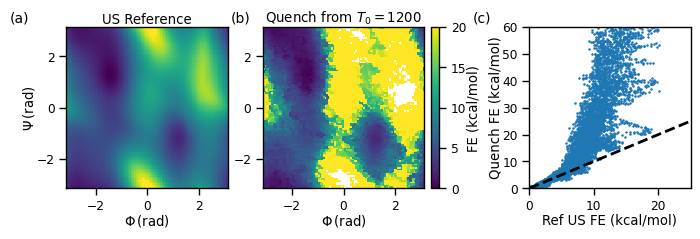

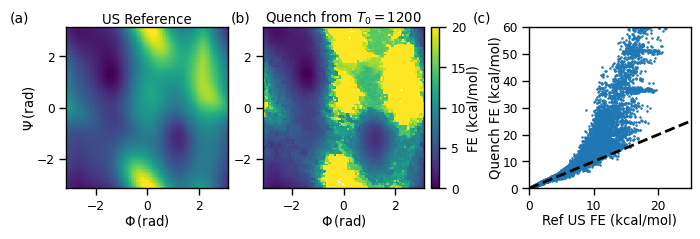

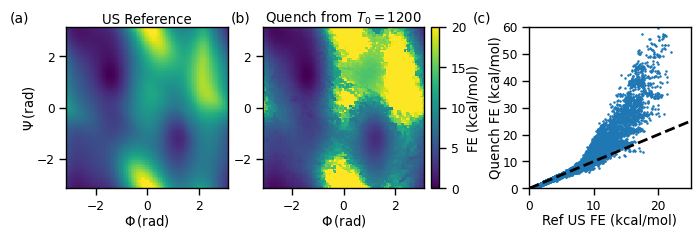

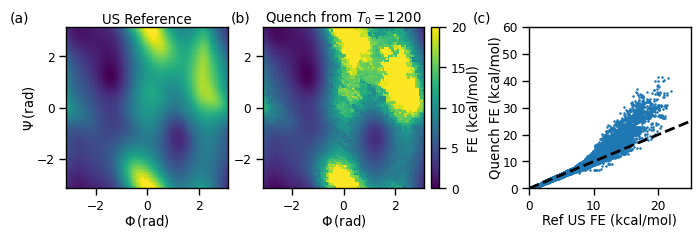

In [8]:
target_kbt = 300.0*0.001985875
run_temp = 1200.0

in_dir = "quench_results/alanine/quench/T0_1200"
umbrella_ref_dir = "quench_results/alanine/ref_alanine_umbrella"

for quench_gamma in [1e-3,1e-4,1e-5,1e-6]:

    F_umbrella = np.load(os.path.join(umbrella_ref_dir,"ref_F_100x100_k24.0_rt300.0_tt300.0_N1000000.npy"))
    F_umbrella -= F_umbrella.min()

    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(7.,3.5))
    plt.viridis()

    fe_file = os.path.join(in_dir,"infinite_stopping_lnrho_qg%.2e_tt300.0_100x100.npy"%(quench_gamma))
    time_file = fe_file.replace('lnrho','time_list')
    F_quench = -target_kbt*np.load(fe_file)
    F_quench -= F_quench.min()
    mask = F_quench != np.inf
    print(f"Time used for gamma: {quench_gamma}: {np.load(time_file).sum()/1e6} ns")

    r = np.corrcoef(F_umbrella[mask].flatten(),F_quench[mask].flatten())
    r2 = (r**2)[0,1]

    im1 = ax[0].imshow(F_umbrella.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
    ax[0].set_title(r"US Reference")
    ax[0].set_xlabel(r"$\Phi\,(\rm{rad})$")
    ax[0].set_ylabel(r"$\Psi\,(\rm{rad})$")

    im2 = ax[1].imshow(F_quench.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
    ax[1].set_xlabel(r"$\Phi\,(\rm{rad})$")
    ax[1].set_title('Quench from $T_0=1200$')

    cb = fig.colorbar(im2,ax=ax[1],fraction=0.045,label='FE (kcal/mol)')

    ax[2].scatter(F_umbrella.flatten(),F_quench.flatten(),s=1)
    ax[2].plot(np.arange(0,25,0.1),np.arange(0,25,0.1),'k--',lw=2)

    ax[2].set_xlabel("Ref US FE (kcal/mol)")
    ax[2].set_ylabel("Quench FE (kcal/mol)")
    ax[2].set_xlim(0,25)
    ax[2].set_ylim(0,60)

    ratio = 1.0
    xleft, xright = ax[2].get_xlim()
    ybottom, ytop = ax[2].get_ylim()
    ax[2].set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    plt.tight_layout(pad=0.1)

    p0_left, p0_bottom, p0_width, p0_height = ax[0].get_position().bounds
    ax[1].set_position([p0_left+p0_width+0.05,p0_bottom,p0_width,p0_height])
    p1_left, p1_bottom, p1_width, p1_height = ax[1].get_position().bounds
    cb.ax.set_position([p1_left+p1_width+0.01, p0_bottom, 0.05, p0_height])
    cb_left, cb_bottom, cb_width, cb_height = cb.ax.get_position().bounds
    ax[2].set_position([cb_left+cb_width+0.09,p0_bottom,p0_width,p0_height])

    ax[0].text(-0.35,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
    ax[1].text(-0.2,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')
    ax[2].text(-0.35,1.1,"(c)",transform=ax[2].transAxes,fontweight='normal',va='top')

    plt.savefig(os.path.join(figure_dir,f"adp_quench_Tstart1200_qg{quench_gamma:.0e}.pdf"),bbox_inches='tight')

### Figure S4 

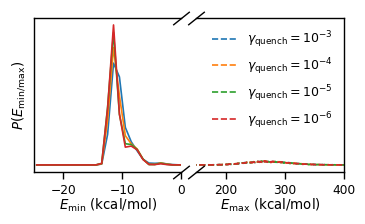

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(4.,2.0))
fig.subplots_adjust(wspace=0.1)
ax1.set_xlim(-25,0)
ax2.set_xlim(150,400)

quench_gamma_list = [1e-3,1e-4,1e-5,1e-6]
histogram_bins = np.arange(-25,430,1)
for quench_gamma in quench_gamma_list:
    Emin_list = np.load(os.path.join(in_dir,"Emin_list_qg%.2e.npy"%(quench_gamma)))
    Emax_list = np.load(os.path.join(in_dir,"Emax_list_qg%.2e.npy"%(quench_gamma)))

    hist,bins = np.histogram(Emin_list,bins=histogram_bins,density=True)
    p = ax1.plot((bins[1:]+bins[:-1])/2.0,hist,)

    hist,bins = np.histogram(Emax_list,bins=histogram_bins,density=True)
    ax2.plot((bins[1:]+bins[:-1])/2.0,hist,c=p[0].get_color(),ls='--',label=r"$\gamma_\mathrm{quench}=10^{%d}$"%(np.log10(quench_gamma)))

ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
#ax1.yaxis.tick_right()
ax1.tick_params(labelright=False)  # don't put tick labels at the top
#ax2.yaxis.tick_left()
ax1.set_xlabel("$E_\mathrm{min}$ (kcal/mol)")
ax1.set_ylabel("$P(E_\mathrm{min/max})$")
ax2.set_xlabel("$E_\mathrm{max}$ (kcal/mol)")
ax2.set_yticks([])
plt.legend(loc=0,framealpha=0,fontsize=9)
#remove yticks from ax2

d = .8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)

plt.savefig(os.path.join(figure_dir,f"adp_quench_Tstart1200_energy_histograms_combined.pdf"),bbox_inches='tight')

## Quench + US

### Figure 4

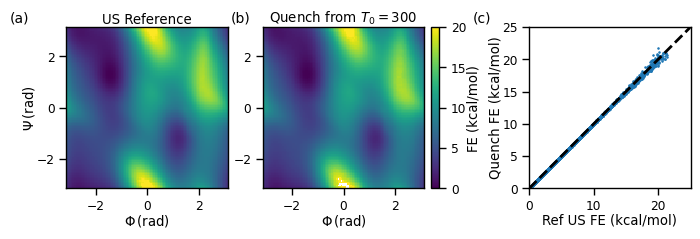

In [10]:
target_kbt = 300.0*0.001985875
run_temp = 300.0

F_umbrella = np.load(os.path.join(umbrella_ref_dir,"ref_F_100x100_k24.0_rt300.0_tt300.0_N1000000.npy"))
F_umbrella -= F_umbrella.min()

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(7.,3.5))
plt.viridis()

F_quench = np.load(os.path.join("quench_results/alanine/quench_US/Tstart_300.0","infinite_stopping_F_100x100_k24.0_rt300.0_tt300.0_qg1.00e-03_N333_N.npy"))
F_quench -= F_quench.min()
mask = F_quench != np.inf

r = np.corrcoef(F_umbrella[mask].flatten(),F_quench[mask].flatten())
r2 = (r**2)[0,1]

im1 = ax[0].imshow(F_umbrella.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
ax[0].set_title(r"US Reference")
ax[0].set_xlabel(r"$\Phi\,(\rm{rad})$")
ax[0].set_ylabel(r"$\Psi\,(\rm{rad})$")



im2 = ax[1].imshow(F_quench.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
ax[1].set_xlabel(r"$\Phi\,(\rm{rad})$")
ax[1].set_title('Quench from $T_0=300$')

cb = fig.colorbar(im2,ax=ax[1],fraction=0.045,label='FE (kcal/mol)')

ax[2].scatter(F_umbrella.flatten(),F_quench.flatten(),s=1)
ax[2].plot(np.arange(0,25,0.1),np.arange(0,25,0.1),'k--',lw=2)

ax[2].set_xlabel("Ref US FE (kcal/mol)")
ax[2].set_ylabel("Quench FE (kcal/mol)")
ax[2].set_xlim(0,25)
ax[2].set_ylim(0,25)

ratio = 1.0
xleft, xright = ax[2].get_xlim()
ybottom, ytop = ax[2].get_ylim()
ax[2].set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

plt.tight_layout(pad=0.1)

p0_left, p0_bottom, p0_width, p0_height = ax[0].get_position().bounds
ax[1].set_position([p0_left+p0_width+0.05,p0_bottom,p0_width,p0_height])
p1_left, p1_bottom, p1_width, p1_height = ax[1].get_position().bounds
cb.ax.set_position([p1_left+p1_width+0.01, p0_bottom, 0.05, p0_height])
cb_left, cb_bottom, cb_width, cb_height = cb.ax.get_position().bounds
ax[2].set_position([cb_left+cb_width+0.09,p0_bottom,p0_width,p0_height])

ax[0].text(-0.35,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
ax[1].text(-0.2,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')
ax[2].text(-0.35,1.1,"(c)",transform=ax[2].transAxes,fontweight='normal',va='top')

plt.savefig(os.path.join(figure_dir,"adp_quench_umbrella_maxsampling_Tstart300_qg1e-3.pdf"),bbox_inches='tight')

### Figure S8-10

Correlation for bf= 6  is  0.40571743819771106
Correlation for bf= 10  is  0.40419087911251345


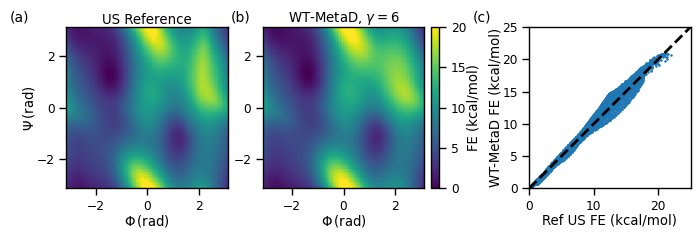

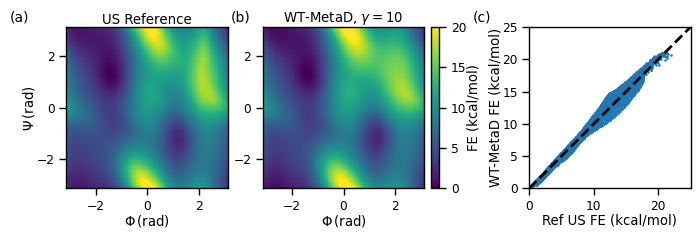

In [11]:
for bf in [6,10]:
    # now we will make an error comparison 3x1 plot comparing US reference to metadynamics
    F_umbrella = np.load(os.path.join(umbrella_ref_dir,"ref_F_100x100_k24.0_rt300.0_tt300.0_N1000000.npy"))
    F_umbrella -= F_umbrella.min()

    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(7.,3.5))
    plt.viridis()


    metad_fes_files = glob(f"quench_results/alanine/ref_WTmetaD/bf{bf}/FES/fes_*.npy")
    metad_fes_files.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
    F_metad_final = np.load(metad_fes_files[-1])
    F_metad_final -= F_metad_final.min()
    mask = F_metad_final != np.inf

    r = np.corrcoef(F_umbrella[mask].flatten(),F_metad_final[mask].flatten())
    r2 = (r**2)[0,1]
    print("Correlation for bf=",bf," is ",r2)
    im1 = ax[0].imshow(F_umbrella.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
    ax[0].set_title(r"US Reference")
    ax[0].set_xlabel(r"$\Phi\,(\rm{rad})$")
    ax[0].set_ylabel(r"$\Psi\,(\rm{rad})$")



    im2 = ax[1].imshow(F_metad_final,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
    ax[1].set_xlabel(r"$\Phi\,(\rm{rad})$")
    ax[1].set_title(f'WT-MetaD, $\gamma={bf}$')


    cb = fig.colorbar(im2,ax=ax[1],fraction=0.045,label='FE (kcal/mol)')

    ax[2].scatter(F_umbrella.flatten(),F_metad_final.T.flatten(),s=1)
    ax[2].plot(np.arange(0,25,0.1),np.arange(0,25,0.1),'k--',lw=2)

    ax[2].set_xlabel("Ref US FE (kcal/mol)")
    ax[2].set_ylabel("WT-MetaD FE (kcal/mol)")
    ax[2].set_xlim(0,25)
    ax[2].set_ylim(0,25)

    ratio = 1.0
    xleft, xright = ax[2].get_xlim()
    ybottom, ytop = ax[2].get_ylim()
    ax[2].set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    plt.tight_layout(pad=0.1)

    p0_left, p0_bottom, p0_width, p0_height = ax[0].get_position().bounds
    ax[1].set_position([p0_left+p0_width+0.05,p0_bottom,p0_width,p0_height])
    p1_left, p1_bottom, p1_width, p1_height = ax[1].get_position().bounds
    cb.ax.set_position([p1_left+p1_width+0.01, p0_bottom, 0.05, p0_height])
    cb_left, cb_bottom, cb_width, cb_height = cb.ax.get_position().bounds
    ax[2].set_position([cb_left+cb_width+0.09,p0_bottom,p0_width,p0_height])

    ax[0].text(-0.35,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
    ax[1].text(-0.2,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')
    ax[2].text(-0.35,1.1,"(c)",transform=ax[2].transAxes,fontweight='normal',va='top')

    plt.savefig(os.path.join(figure_dir,f"adp_quench_metad_bf{bf}_100ns.pdf"),bbox_inches='tight')

Correlation for bf= 6  is  0.4052797412802125
Correlation for bf= 10  is  0.40371497760694636


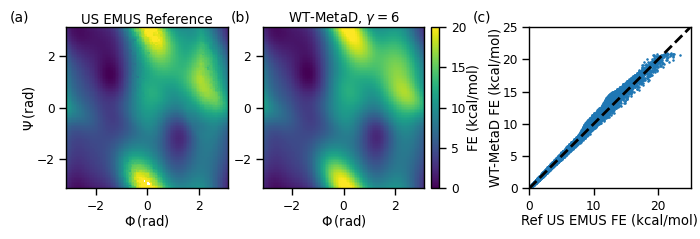

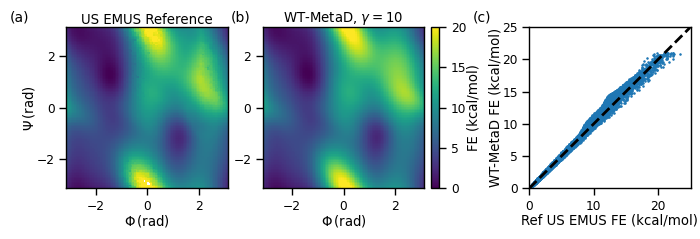

In [12]:
for bf in [6,10]:
    # now we will make an error comparison 3x1 plot comparing US reference to metadynamics
    F_umbrella = np.load(os.path.join(umbrella_ref_dir,"F_EMUS_rt300.0_tt300.0_N1000.npy"))
    F_umbrella -= F_umbrella.min()

    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(7.,3.5))
    plt.viridis()


    metad_fes_files = glob(f"quench_paper_data/ref_WTmetaD/bf{bf}/FES/fes_*.npy")
    metad_fes_files.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
    F_metad_final = np.load(metad_fes_files[-1])
    F_metad_final -= F_metad_final.min()
    mask1 = F_metad_final != np.inf
    mask2 = F_umbrella != np.inf
    mask = np.logical_and(mask1,mask2)

    r = np.corrcoef(F_umbrella[mask].flatten(),F_metad_final[mask].flatten())
    r2 = (r**2)[0,1]
    print("Correlation for bf=",bf," is ",r2)
    im1 = ax[0].imshow(F_umbrella.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
    ax[0].set_title(r"US EMUS Reference")
    ax[0].set_xlabel(r"$\Phi\,(\rm{rad})$")
    ax[0].set_ylabel(r"$\Psi\,(\rm{rad})$")



    im2 = ax[1].imshow(F_metad_final,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
    ax[1].set_xlabel(r"$\Phi\,(\rm{rad})$")
    #ax[1].set_ylabel(r"$\Psi\,(\rm{rad})$")
    ax[1].set_title(f'WT-MetaD, $\gamma={bf}$')

    #cax = make_square_axes_with_colorbar(ax[1],size=0.1,pad=0.1)
    #fig.colorbar(im2,cax=cax)
    cb = fig.colorbar(im2,ax=ax[1],fraction=0.045,label='FE (kcal/mol)')

    ax[2].scatter(F_umbrella.flatten(),F_metad_final.T.flatten(),s=1)
    ax[2].plot(np.arange(0,25,0.1),np.arange(0,25,0.1),'k--',lw=2)

    ax[2].set_xlabel("Ref US EMUS FE (kcal/mol)")
    ax[2].set_ylabel("WT-MetaD FE (kcal/mol)")
    #ax[2].set(xlim=(0, 25), ylim=(0, 60))
    #ax[2].axis('equal')
    ax[2].set_xlim(0,25)
    ax[2].set_ylim(0,25)

    ratio = 1.0
    xleft, xright = ax[2].get_xlim()
    ybottom, ytop = ax[2].get_ylim()
    ax[2].set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    plt.tight_layout(pad=0.1)

    p0_left, p0_bottom, p0_width, p0_height = ax[0].get_position().bounds
    ax[1].set_position([p0_left+p0_width+0.05,p0_bottom,p0_width,p0_height])
    p1_left, p1_bottom, p1_width, p1_height = ax[1].get_position().bounds
    cb.ax.set_position([p1_left+p1_width+0.01, p0_bottom, 0.05, p0_height])
    cb_left, cb_bottom, cb_width, cb_height = cb.ax.get_position().bounds
    ax[2].set_position([cb_left+cb_width+0.09,p0_bottom,p0_width,p0_height])

    ax[0].text(-0.35,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
    ax[1].text(-0.2,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')
    ax[2].text(-0.35,1.1,"(c)",transform=ax[2].transAxes,fontweight='normal',va='top')

    plt.savefig(os.path.join(figure_dir,f"adp_quench_metad_bf{bf}_100ns_refEMUS.pdf"),bbox_inches='tight')

### Figure 5

In [13]:
#compute metad error for bf 6
bf = 6

metad_fes_files = glob(f"quench_paper_data/ref_WTmetaD/bf{bf}/FES/fes_*.npy")
metad_fes_files.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))

total_metad_time = 100 # ns

metad_rmse_list = []
for metad_file in metad_fes_files[::10]:
    F_metad = np.load(metad_file)
    F_metad -= F_metad.min()
    mask = F_metad != np.inf
    mask2 = F_umbrella.T <= 20.0*target_kbt
    combined_mask = np.logical_and(mask,mask2)
    rms_error = np.sqrt(np.mean((F_metad[combined_mask]-F_umbrella.T[combined_mask])**2))
    metad_rmse_list.append(rms_error)

metad_bf6_times = np.array([int(x.split("_")[-1].split(".")[0]) for x in metad_fes_files])*total_metad_time/len(metad_fes_files)
metad_bf6_times = metad_bf6_times[::10]

20 kbt: 11.91525


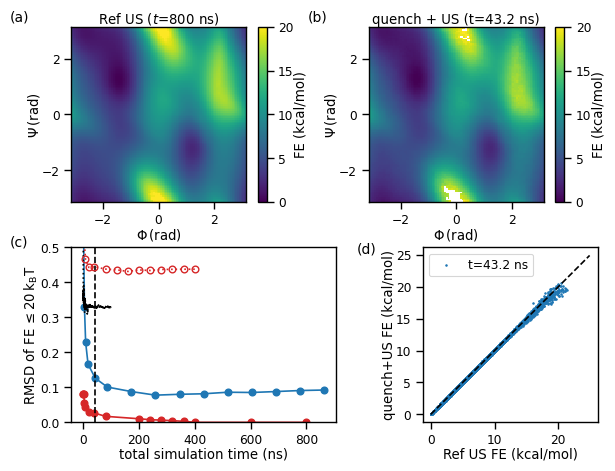

In [14]:
target_temp = 300.0
run_temp = 300.0
quench_gamma = 0.001
kb = 0.001985875

num_restart_list = np.array([1,2,5,10,20,50,100,200,300,400,500,600,700,800,900,1000])


F_umbrella = np.load(os.path.join(umbrella_ref_dir,"ref_F_100x100_k24.0_rt300.0_tt300.0_N2000000.npy"))
F_umbrella -= F_umbrella.min()
mask = F_umbrella <= run_temp * kb * 20
print("20 kbt:",run_temp * kb * 20)

#rmsd_list = np.zeros(len(num_restart_list))
rmsd_list = []
for i,num_restart in enumerate(num_restart_list):
    data_file = os.path.join("quench_results/alanine/quench_US/Tstart_300.0","infinite_stopping_F_100x100_k24.0_rt300.0_tt300.0_qg%.2e_N%d_N.npy"%(quench_gamma,num_restart))
    if os.path.exists(data_file):
        F_quench = np.load(data_file)
        F_quench -= F_quench.min()
        mask_quench = np.logical_and(F_umbrella != np.inf,F_quench != np.inf)

        rmsd_list.append(np.sqrt(np.mean((F_quench[mask_quench]-F_umbrella[mask_quench])**2)))
rmsd_list = np.array(rmsd_list)


rmsd_list_emus = np.zeros(len(num_restart_list))
for i,num_restart in enumerate(num_restart_list):
    F_quench = np.load(os.path.join(umbrella_ref_dir,"vary_n_restart","F_EMUS_rt300.0_tt300.0_N%d.npy"%(num_restart)))
    F_quench -= F_quench.min()
    rmsd_list_emus[i] = np.sqrt(np.mean((F_quench[mask]-F_umbrella[mask])**2))    

fig, axes = plt.subplot_mosaic("AB;CD",figsize=(6.0,4.5))
plt.viridis()

im1 = axes['A'].imshow(F_umbrella.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
axes['A'].set_xlabel(r"$\Phi\,(\rm{rad})$")
axes['A'].set_ylabel(r"$\Psi\,(\rm{rad})$")
axes['A'].set_title("Ref US ($t$=800 ns)")
axes['A'].set_yticks(np.arange(-2,2.1,2))


fig.colorbar(im1,ax=axes['A'],label='FE (kcal/mol)')

example_index = 50 
F_quench = np.load(os.path.join("quench_results/alanine/quench_US/Tstart_300.0","infinite_stopping_F_100x100_k24.0_rt300.0_tt300.0_qg%.2e_N%d_N.npy"%(quench_gamma,example_index)))
F_quench -= F_quench.min()

im2 = axes['B'].imshow(F_quench.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=20.0,interpolation='none')
axes['B'].set_xlabel(r"$\Phi\,(\rm{rad})$")
axes['B'].set_ylabel(r"$\Psi\,(\rm{rad})$")
axes['B'].set_yticks(np.arange(-2,2.1,2))

fig.colorbar(im1,ax=axes['B'],label='FE (kcal/mol)')

time_list = np.zeros(len(num_restart_list))
for i,num_restart in enumerate(num_restart_list):
    data_file = os.path.join("quench_results/alanine/quench_US/Tstart_300.0","infinite_stopping_time_20x20_100x100_k24.0_tt300.0_qg1.00e-03_N%d.npy"%(num_restart))
    time_list[i] = np.load(data_file)

#print("Times: ",time_list/1e6)
#print("Errors: ",rmsd_list)

time_for_example = time_list[num_restart_list==example_index][0]/1e6
axes['B'].set_title(f"quench + US (t={time_for_example:.1f} ns)")


axes['C'].plot(time_list/1e6,rmsd_list,'o-',color=mpl_blue)

N_list = np.array([1000,2000,5000,10000,20000,50000,100000,200000,500000,600000,700000,800000,900000,1000000,1500000,2000000])

axes['C'].plot(400*N_list/1e6,np.load(os.path.join(umbrella_ref_dir,"error_list_rt300.0_100x100.npy")),'o-',color=mpl_red)
axes['C'].set_xlabel("total simulation time (ns)")
axes['C'].set_ylabel(r"RMSD of FE$\,\leq 20\,\rm{k}_{B}\rm{T}$")
axes['C'].axvline(time_for_example,linestyle='--',c='k')
axes['C'].set_xticks(np.arange(0,1250,200))

#show metad ref data
axes['C'].plot(metad_bf6_times,metad_rmse_list,'k:')
#show emus data
axes['C'].plot(0.4*num_restart_list,rmsd_list_emus,linestyle=":",color=mpl_red,marker='o',mfc='none')
axes['C'].set_ylim(0,0.5)

axes['D'].scatter(F_umbrella.flatten(),F_quench.flatten(),s=1,label=f"t={time_for_example:.1f} ns")
axes['D'].plot(np.arange(0,25,0.1),np.arange(0,25,0.1),'k--')
axes['D'].set_xlabel("Ref US FE (kcal/mol)")
axes['D'].set_ylabel("quench+US FE (kcal/mol)")
axes['D'].legend(loc=0)



axes['A'].text(-0.35,1.1,"(a)",transform=axes['A'].transAxes,fontweight='normal',va='top')
axes['B'].text(-0.35,1.1,"(b)",transform=axes['B'].transAxes,fontweight='normal',va='top')
axes['C'].text(-0.35,-0.19,"(c)",transform=axes['A'].transAxes,fontweight='normal',va='top')

plt.tight_layout(pad=0.0)
pA_left,pA_bottom,pA_width,pA_height = axes['A'].get_position().bounds
pB_left,pB_bottom,pB_width,pB_height = axes['B'].get_position().bounds
pC_left,pC_bottom,pC_width,pC_height = axes['C'].get_position().bounds
pD_left,pD_bottom,pD_width,pD_height = axes['D'].get_position().bounds

axes['C'].set_position([pA_left,pC_bottom,pA_width+0.15,pA_height])
axes['D'].set_position([pB_left+0.09,pD_bottom,pB_width,pB_height])
axes['D'].text(-0.38,1.03,"(d)",transform=axes['D'].transAxes,fontweight='normal',va='top')

plt.savefig(os.path.join(figure_dir,"adp_quench_umbrella_efficiency_Tstart300_qg1e-3.pdf"),bbox_inches='tight')

## Figure 7

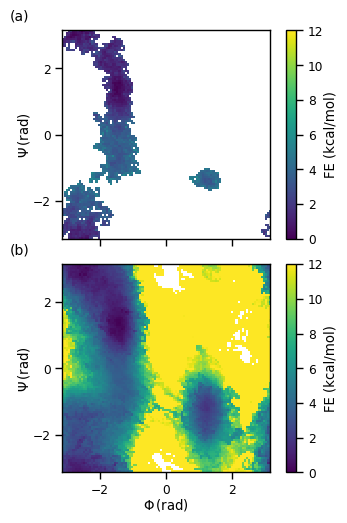

In [15]:
target_temp = 300.0
run_temp = 1200.0
quench_gamma = 0.001

F_umbrella_psi = np.load(os.path.join(umbrella_ref_dir,"ref_psi_F_100x100_k24.0_rt300.0_tt300.0_N2000000.npy"))
F_umbrella_psi -= F_umbrella_psi.min()

fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=False,figsize=(3+3./8,5))
plt.viridis()

F_quench_psi = np.load(os.path.join("quench_results/alanine/quench_US/1d_Tstart1200","infinite_stopping_psi_F_100x100_k24.0_rt1200.0_tt300.0_qg1.00e-03_N666.npy"))
F_quench_psi -= F_quench_psi.min()

im1 = ax[0].imshow(F_umbrella_psi.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=12.0,interpolation='none')
plt.colorbar(im1,ax=ax[0],label='FE (kcal/mol)')

ax[0].set_ylabel(r"$\Psi\,(\rm{rad})$")
ax[0].set_yticks(np.arange(-2,2.1,2))


im2 = ax[1].imshow(F_quench_psi.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=12.0,interpolation='none')
plt.colorbar(im2,ax=ax[1],label='FE (kcal/mol)')

#cax = make_square_axes_with_colorbar(ax[1], size=0.1, pad=0.1)

ax[0].text(-0.25,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
ax[1].text(-0.25,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')

ax[1].set_xlabel(r"$\Phi\,(\rm{rad})$")
ax[1].set_ylabel(r"$\Psi\,(\rm{rad})$")
ax[1].set_yticks(np.arange(-2,2.1,2))
#plt.colorbar(im2,cax=cax,label='FE (kcal/mol)')
plt.tight_layout(pad=0)
plt.savefig(os.path.join(figure_dir,"adp_quench_umbrella_psi_only_Tstart1200_qg1e-3.pdf"),bbox_inches='tight')

## Advantage 3, other temps

0 0 200.0 400.0
1 0 200.0 300.0
2 0 200.0 200.0
0 1 300.0 400.0
1 1 300.0 300.0
2 1 300.0 200.0
0 2 400.0 400.0
1 2 400.0 300.0
2 2 400.0 200.0


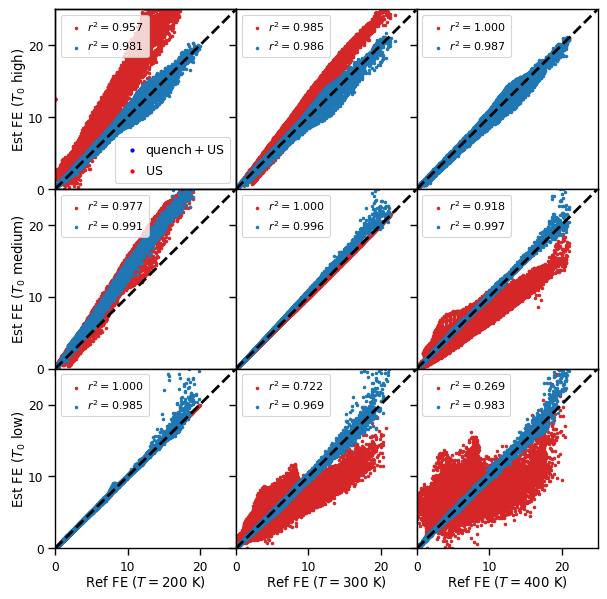

In [16]:
run_temp_list = [200.0,300.0,400.0]
run_temp_quench_list = [75.0,300.0,1200.0]

target_temp_list = [200.0,300.0,400.0]
quench_gamma = 0.001

fig, ax = plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(7.,7.))
fig.subplots_adjust(wspace=0,hspace=0)

for i in range(3):
    target_temp = target_temp_list[i]
    F_ref = np.load(os.path.join(umbrella_ref_dir,"ref_F_100x100_k24.0_rt%.1f_tt%.1f_N2000000.npy"%(target_temp,target_temp)))
    F_ref -= F_ref.min()

    for j in range(3):
        run_temp = run_temp_list[2-j]
        
        print(j,i,target_temp, run_temp)
        
        run_temp_quench = run_temp_quench_list[2-j]
        F_quench = np.load(os.path.join("quench_results/alanine/quench_US",f"Tstart_{run_temp_quench:.1f}",f"infinite_stopping_F_100x100_k24.0_tt{target_temp:.1f}_qg1.00e-03_N666.npy"))
        F_quench -= F_quench.min()

        mask_quench = np.logical_and(F_ref != np.inf,F_quench != np.inf)


        r2_quench = np.corrcoef(F_ref[mask_quench].flatten(),F_quench[mask_quench].flatten())**2
        r2_quench = r2_quench[0,1]
        F_umbrella = np.load(os.path.join(umbrella_ref_dir,"ref_F_100x100_k24.0_rt%.1f_tt%.1f_N2000000.npy"%(run_temp,target_temp)))
        F_umbrella -= F_umbrella.min()

        mask_umbrella = np.logical_and(F_ref != np.inf,F_umbrella != np.inf)

        r2 = np.corrcoef(F_ref[mask_umbrella].flatten(),F_umbrella[mask_umbrella].flatten())**2
        r2 = r2[0,1]
        ax[j,i].scatter(F_ref[mask_umbrella].flatten(),F_umbrella[mask_umbrella].flatten(),s=3,color=mpl_red,label=r"$r^2=%.3f$"%r2)#, T_0=%d$ K"%(r2,run_temp))
        ax[j,i].scatter(F_ref[mask_quench].flatten(),F_quench[mask_quench].flatten(),s=3,color=mpl_blue,label=r"$r^2=%.3f$"%r2_quench)#, T_0=%d$ K"%(r2_quench,run_temp_quench))
        ax[j,i].plot(np.arange(0,25,0.1),np.arange(0,25,0.1),'k--',lw=2)
        ax[j,i].legend(loc='upper left',frameon=True,fontsize=8,handletextpad=0)
        ax[j,i].set_yticks(np.arange(0,25,10))
        ax[j,i].set_xlim(0,25)
        ax[j,i].set_ylim(0,25)


ax00_2 = ax[0,0].twinx()
ax00_2.scatter(0,0,s=5,color="blue",label=r"$\rm{quench+US}$")
ax00_2.scatter(0,0,s=5,color="red",label=r"$\rm{US}$")
ax00_2.get_yaxis().set_visible(False)
ax00_2.legend(loc='lower right',frameon=True,fontsize=9,handletextpad=0)


ax[2,0].set_xlabel("Ref FE ($T=200$ K)")
ax[2,1].set_xlabel("Ref FE ($T=300$ K)")
ax[2,2].set_xlabel("Ref FE ($T=400$ K)")

ax[0,0].set_ylabel("Est FE ($T_0$ high)")
ax[1,0].set_ylabel("Est FE ($T_0$ medium)")
ax[2,0].set_ylabel("Est FE ($T_0$ low)")

plt.savefig(os.path.join(figure_dir,"adp_quench_umbrella_compare_other_temps_qg1e-3.png"),bbox_inches='tight',dpi=300)

# Solvated alanine

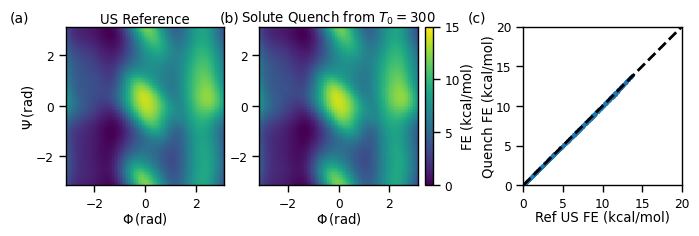

In [17]:
target_temp = 300.0
run_temp = 300.0
quench_gamma = 0.001

F_umbrella = np.load(os.path.join("quench_results/alanine_solvent/","ref_solv_F_100x100_k24.0_rt300.0_tt300.0_N2000000.npy"))
F_umbrella -= F_umbrella.min()

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(7.,3.5))
plt.viridis()

F_quench = np.load(os.path.join("quench_results/alanine_solvent","solv_F_100x100_k24.0_rt%.1f_tt%.1f_qg%.2e_N333_N.npy"%(run_temp,target_temp,quench_gamma)))
F_quench -= F_quench.min()
mask = F_quench != np.inf

r = np.corrcoef(F_umbrella[mask].flatten(),F_quench[mask].flatten())
r2 = (r**2)[0,1]

im1 = ax[0].imshow(F_umbrella.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=15.0,interpolation='none')
ax[0].set_title(r"US Reference")
ax[0].set_xlabel(r"$\Phi\,(\rm{rad})$")
ax[0].set_ylabel(r"$\Psi\,(\rm{rad})$")

im2 = ax[1].imshow(F_quench.T,origin='lower',extent=(-np.pi,np.pi,-np.pi,np.pi),vmin=0.0,vmax=15.0,interpolation='none')
ax[1].set_xlabel(r"$\Phi\,(\rm{rad})$")
ax[1].set_title('Solute Quench from $T_0=300$')

cb = fig.colorbar(im2,ax=ax[1],fraction=0.045,label='FE (kcal/mol)')
# set colorbar tics to be 0 to 15 in steps of 5
cb.set_ticks(np.arange(0,16,5))

ax[2].scatter(F_umbrella.flatten(),F_quench.flatten(),s=1)
ax[2].plot(np.arange(0,20,0.1),np.arange(0,20,0.1),'k--',lw=2)

ax[2].set_xlabel("Ref US FE (kcal/mol)")
ax[2].set_ylabel("Quench FE (kcal/mol)")
ax[2].set_xlim(0,20)
ax[2].set_ylim(0,20)

ratio = 1.0
xleft, xright = ax[2].get_xlim()
ybottom, ytop = ax[2].get_ylim()
ax[2].set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

plt.tight_layout(pad=0.1)

p0_left, p0_bottom, p0_width, p0_height = ax[0].get_position().bounds
ax[1].set_position([p0_left+p0_width+0.05,p0_bottom,p0_width,p0_height])
p1_left, p1_bottom, p1_width, p1_height = ax[1].get_position().bounds
cb.ax.set_position([p1_left+p1_width+0.01, p0_bottom, 0.05, p0_height])
cb_left, cb_bottom, cb_width, cb_height = cb.ax.get_position().bounds
ax[2].set_position([cb_left+cb_width+0.09,p0_bottom,p0_width,p0_height])

ax[0].text(-0.35,1.1,"(a)",transform=ax[0].transAxes,fontweight='normal',va='top')
ax[1].text(-0.25,1.1,"(b)",transform=ax[1].transAxes,fontweight='normal',va='top')
ax[2].text(-0.35,1.1,"(c)",transform=ax[2].transAxes,fontweight='normal',va='top')
plt.savefig(os.path.join(figure_dir,"adp_solvated_umbrella_Tstart300_qg1e-3.pdf"),bbox_inches='tight')